# **Catatan**

- Kode program 1 adalah kalian tinggal running kode ini agar dapat melihat training dengan data asli tanpa dibersihkan, kemudian dievaluasi hasilnya dan dicatat. (running sendiri ya, kalau ada error screenshot kirim ke wa saya)
- hasil training dengan data asli (classification non-tuning) dibandingkan dengan hasil training data asli menggunakan hyperparameter tuning
- metric evaluasinya harus ada accuracy, precision, recall, dan f1-score

Kode ini untuk Topik ini:
- Ransomware Detection Using Transformer
Topik Riset 1:
"Studi Transformer-Based Sequence Modelling untuk Deteksi Ransomware Melalui Analisis Trafik Jaringan yang Mengenkripsi Secara Tiba-tiba"
Deskripsi:
Model Transformer dilatih untuk mendeteksi pola enkripsi yang tiba-tiba dalam trafik jaringan. Dengan memanfaatkan arsitektur Transformer, model dapat mengenali urutan paket data yang menunjukkan aktivitas enkripsi ransomware secara dini sebelum terjadi dampak serius.
Novelty: Tinggi. Penggunaan Transformer untuk mendeteksi pola enkripsi ransomware yang tiba-tiba dalam trafik jaringan belum banyak dieksplorasi secara spesifik. Transformer memiliki kemampuan menangani urutan data panjang dan deteksi pola, sehingga bisa menghadirkan pendekatan baru dalam prediksi serangan ransomware.
Dataset: UNSW-NB15 Dataset
Dataset ini mencakup trafik yang mencakup berbagai serangan jaringan, termasuk backdoor, yang relevan untuk deteksi ransomware. Model Transformer dapat dilatih menggunakan pola trafik berbahaya dari dataset ini untuk mendeteksi aktivitas enkripsi ransomware.
Dataset: UNSW-NB15 Dataset

# **Tolong di running sendiri ya, kalau ada error tanyakan dahalu melalui chatgpt ya**

# **Importing Modules and Libraries**

In [16]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


# **Importing Datasets**

Mount Google Drive:

Digunakan untuk mengakses file yang disimpan di Google Drive.

In [17]:
data = pd.read_csv('./Android_Ransomeware.csv')

Menampilkan informasi awal tentang data:

Menampilkan 5 baris pertama dari dataset dan informasi tentang tipe data, jumlah entri, dan kolom yang ada di dalam dataset.

In [18]:
data.head(n=5)

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,172.217.2.174-10.42.0.211-443-51023-6,10.42.0.211,51023,172.217.2.174,443,6,16/06/2017 03:55:47,151054,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,172.217.2.174-10.42.0.211-443-51023-6,10.42.0.211,51023,172.217.2.174,443,6,16/06/2017 03:55:47,349,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,172.217.12.174-10.42.0.211-443-34259-6,10.42.0.211,34259,172.217.12.174,443,6,16/06/2017 03:55:52,119,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,172.217.10.74-10.42.0.211-443-55509-6,10.42.0.211,55509,172.217.10.74,443,6,16/06/2017 03:55:53,37055,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,4,172.217.2.174-10.42.0.211-443-44852-6,10.42.0.211,44852,172.217.2.174,443,6,16/06/2017 03:55:58,178727,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392034 entries, 0 to 392033
Data columns (total 86 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    392034 non-null  int64  
 1   Flow ID                       392034 non-null  object 
 2    Source IP                    392034 non-null  object 
 3    Source Port                  392034 non-null  int64  
 4    Destination IP               392034 non-null  object 
 5    Destination Port             392034 non-null  int64  
 6    Protocol                     392034 non-null  int64  
 7    Timestamp                    392034 non-null  object 
 8    Flow Duration                392034 non-null  int64  
 9    Total Fwd Packets            392034 non-null  int64  
 10   Total Backward Packets       392034 non-null  int64  
 11  Total Length of Fwd Packets   392034 non-null  float64
 12   Total Length of Bwd Packets  392034 non-nul

In [20]:
data.shape

(392034, 86)

Ini adalah proses atau tahapan persiapan data yang baik sebelum dilanjutkan ke tahap analisis atau pemodelan.

# **Data Visualization**

/tmp/ipykernel_1027044/1787916036.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


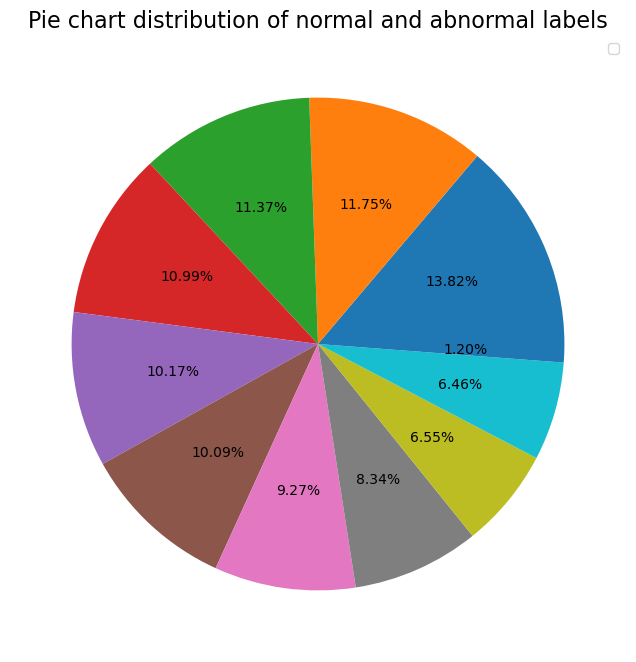

In [21]:
plt.figure(figsize=(8,8))
plt.pie(data["Label"].value_counts(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.show()


# **Label Encoding**

In [22]:
data['Label'].value_counts()

Label
SVpeng         54161
PornDroid      46082
Koler          44555
Benign         43091
RansomBO       39859
Charger        39551
Simplocker     36340
WannaLocker    32701
Jisut          25672
Lockerpin      25307
Pletor          4715
Name: count, dtype: int64

In [23]:
# Label Encoding
bin_label = pd.DataFrame(data["Label"].map(lambda x:'normal' if x=="Benign" else 'abnormal'))

bin_data = data.copy()
bin_data["Label"] = bin_label

le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)

bin_data["Label"] = enc_label

# reduce dataset -> 20%
bin_data = bin_data.sample(frac=0.2, random_state=1)  # random_state is for reproducibility

le1.classes_

array(['abnormal', 'normal'], dtype=object)

In [24]:
# **DATA SPLITTING**

# 1. Mengimpor Modul yang Diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from os import path
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


X_bin = bin_data.drop(columns=['Label'],axis=1)
y_bin = bin_data['Label']

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=50)


# **DATA SPLITTING**

# 1. Mengimpor Modul yang Diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from os import path
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


X_bin = bin_data.drop(columns=['Label'],axis=1)
y_bin = bin_data['Label']

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=50)


# **LIBRARY TRANSFORMER**

# **Hyperparameter Tuning**

In [25]:
# import itertools

# # Define the hyperparameters grid
# param_grid = {
#     'lr': [0.001, 0.0005],
#     'batch_size': [16, 32],
#     'nhead': [2, 4]
# }

# # Track the best model
# best_accuracy = 0
# best_params = None

# # Get the number of unique classes from y_train (or y)
# num_classes = len(np.unique(y))  # Assuming 'y' is your target variable

# # Loop over all combinations of hyperparameters
# for lr, batch_size, nhead in itertools.product(param_grid['lr'],
#                                                param_grid['batch_size'],
#                                                param_grid['nhead']):
#     print(f'Training with lr={lr}, batch_size={batch_size}, nhead={nhead}')

#     # Reinitialize model with new hyperparameters, ensuring consistent d_model and num_classes
#     model = TransformerModel(input_dim=X_train_tensor.shape[1],
#                              num_classes=num_classes,  # Use the correct number of classes
#                              d_model=128, nhead=nhead, num_layers=3, dropout=0.3)

#     optimizer = torch.optim.Adam(model.parameters(), lr=lr)
#     criterion = nn.CrossEntropyLoss()

#     # DataLoader with the new batch size
#     train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

#     # Train for 2 epochs (for quick demonstration)
#     for epoch in range(2):
#         model.train()
#         for inputs, labels in train_loader:
#             optimizer.zero_grad()
#             outputs = model(inputs)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()

#     # Validate and calculate accuracy
#     model.eval()
#     with torch.no_grad():
#         y_pred_probs = model(X_val_tensor)
#         _, y_pred = torch.max(y_pred_probs, 1)
#         accuracy = accuracy_score(y_val, y_pred.numpy())

#     print(f'Validation Accuracy: {accuracy * 100:.2f}%')

#     # Save best parameters
#     if accuracy > best_accuracy:
#         best_accuracy = accuracy
#         best_params = {'lr': lr, 'batch_size': batch_size, 'nhead': nhead}

# print(f'Best Params: {best_params} with Accuracy: {best_accuracy * 100:.2f}%')

# **4. TRANSFORMER "FS"**

# **CLASSIFICATION Non-Tuning**

Fold 1
Accuracy for fold 1: 89.29%
F1 Score for fold 1: 0.8423
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      7001
      normal       0.00      0.00      0.00       840

    accuracy                           0.89      7841
   macro avg       0.45      0.50      0.47      7841
weighted avg       0.80      0.89      0.84      7841



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


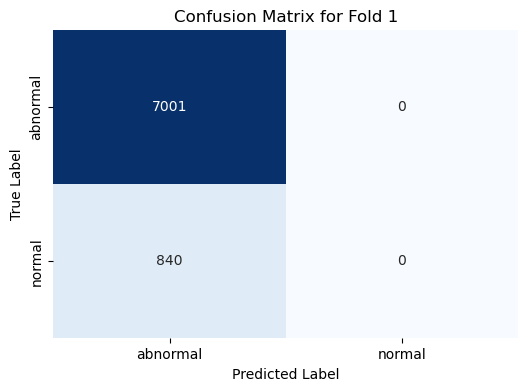

Fold 2
Accuracy for fold 2: 89.25%
F1 Score for fold 2: 0.8418
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      6998
      normal       0.00      0.00      0.00       843

    accuracy                           0.89      7841
   macro avg       0.45      0.50      0.47      7841
weighted avg       0.80      0.89      0.84      7841



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


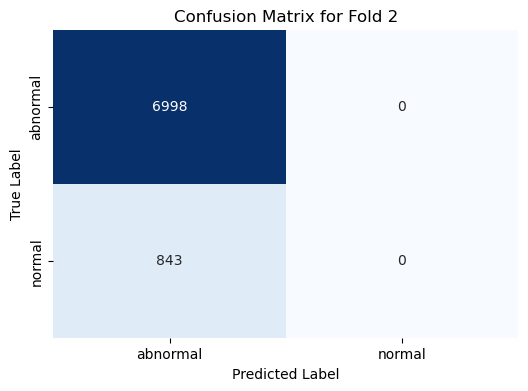

Fold 3
Accuracy for fold 3: 88.67%
F1 Score for fold 3: 0.8335
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      6953
      normal       0.00      0.00      0.00       888

    accuracy                           0.89      7841
   macro avg       0.44      0.50      0.47      7841
weighted avg       0.79      0.89      0.83      7841



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


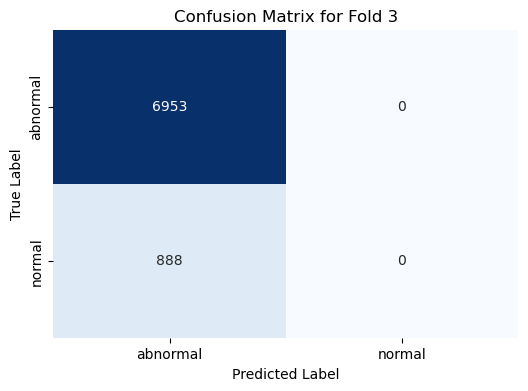

Fold 4
Accuracy for fold 4: 89.08%
F1 Score for fold 4: 0.8394
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      6985
      normal       0.00      0.00      0.00       856

    accuracy                           0.89      7841
   macro avg       0.45      0.50      0.47      7841
weighted avg       0.79      0.89      0.84      7841



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


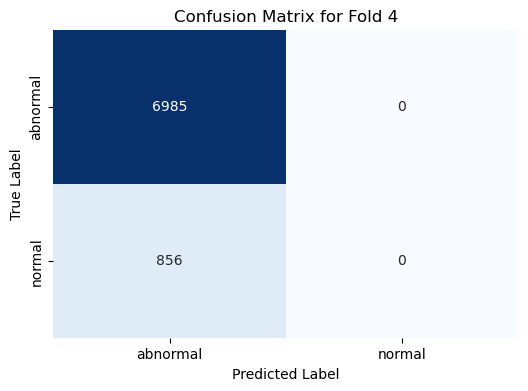

Fold 5
Accuracy for fold 5: 88.61%
F1 Score for fold 5: 0.8326
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      6948
      normal       0.00      0.00      0.00       893

    accuracy                           0.89      7841
   macro avg       0.44      0.50      0.47      7841
weighted avg       0.79      0.89      0.83      7841



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


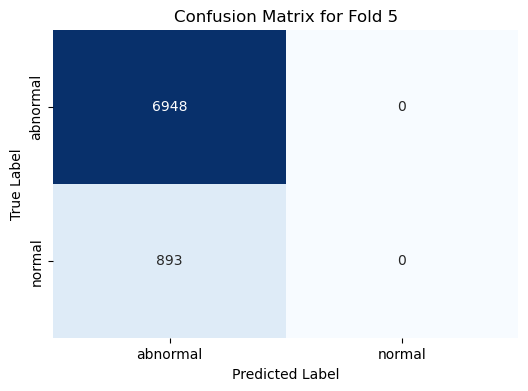

Fold 6
Accuracy for fold 6: 88.69%
F1 Score for fold 6: 0.8337
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      6954
      normal       0.00      0.00      0.00       887

    accuracy                           0.89      7841
   macro avg       0.44      0.50      0.47      7841
weighted avg       0.79      0.89      0.83      7841



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


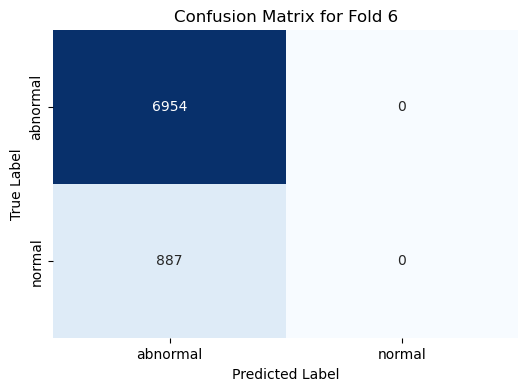

Fold 7
Accuracy for fold 7: 88.88%
F1 Score for fold 7: 0.8365
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      6969
      normal       0.00      0.00      0.00       872

    accuracy                           0.89      7841
   macro avg       0.44      0.50      0.47      7841
weighted avg       0.79      0.89      0.84      7841



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


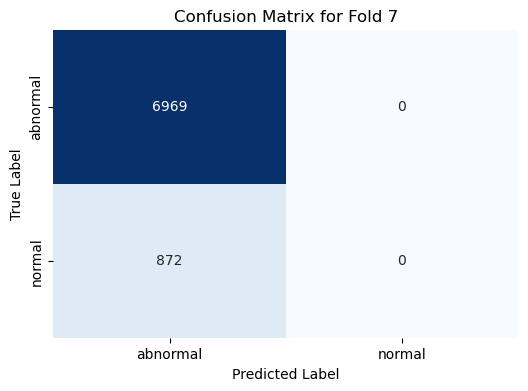

Fold 8
Accuracy for fold 8: 89.17%
F1 Score for fold 8: 0.8407
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      6991
      normal       0.00      0.00      0.00       849

    accuracy                           0.89      7840
   macro avg       0.45      0.50      0.47      7840
weighted avg       0.80      0.89      0.84      7840



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


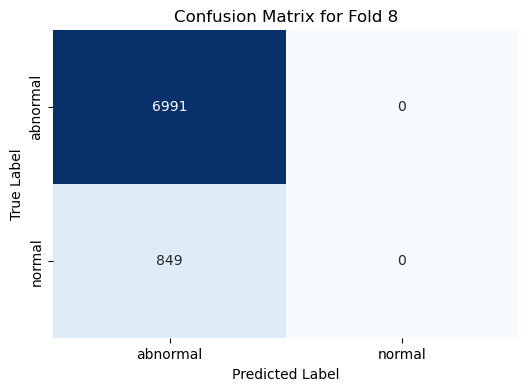

Fold 9
Accuracy for fold 9: 89.20%
F1 Score for fold 9: 0.8410
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      6993
      normal       0.00      0.00      0.00       847

    accuracy                           0.89      7840
   macro avg       0.45      0.50      0.47      7840
weighted avg       0.80      0.89      0.84      7840



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


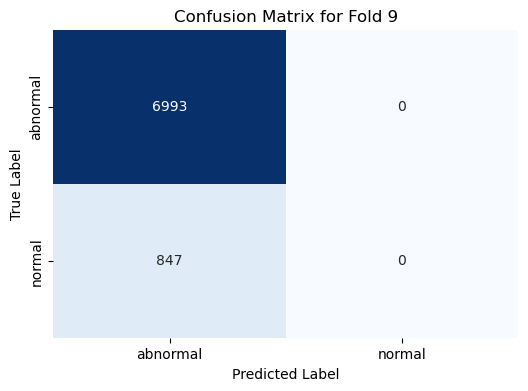

Fold 10
Accuracy for fold 10: 89.29%
F1 Score for fold 10: 0.8423
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      7000
      normal       0.00      0.00      0.00       840

    accuracy                           0.89      7840
   macro avg       0.45      0.50      0.47      7840
weighted avg       0.80      0.89      0.84      7840



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


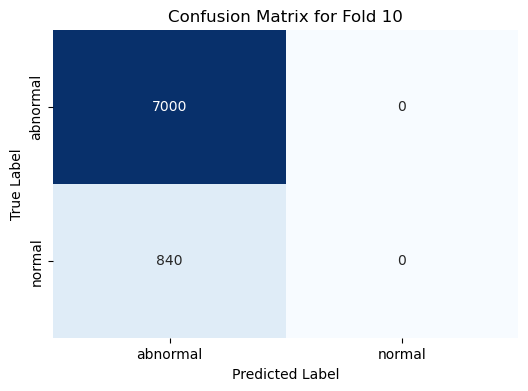

Average Accuracy: 89.01%
Average F1 Score: 0.8384


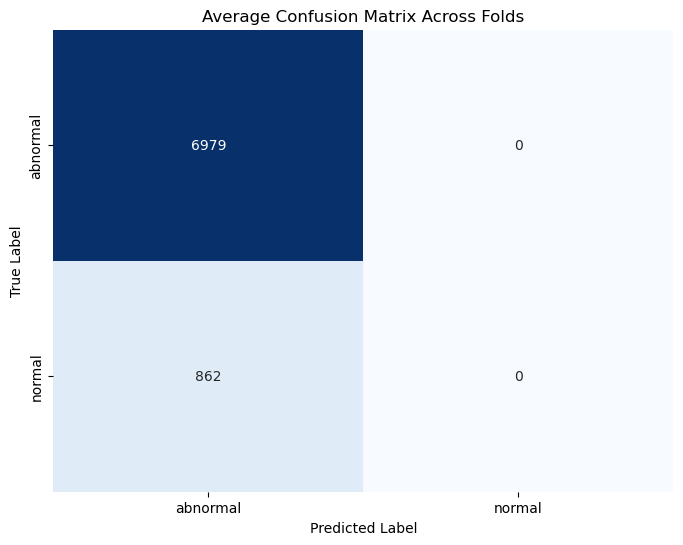

Hasil Deteksi Pola Enkripsi Ransomware:
Fold 1: Akurasi = 89.29%, F1 Score = 0.8423
Fold 2: Akurasi = 89.25%, F1 Score = 0.8418
Fold 3: Akurasi = 88.67%, F1 Score = 0.8335
Fold 4: Akurasi = 89.08%, F1 Score = 0.8394
Fold 5: Akurasi = 88.61%, F1 Score = 0.8326
Fold 6: Akurasi = 88.69%, F1 Score = 0.8337
Fold 7: Akurasi = 88.88%, F1 Score = 0.8365
Fold 8: Akurasi = 89.17%, F1 Score = 0.8407
Fold 9: Akurasi = 89.20%, F1 Score = 0.8410
Fold 10: Akurasi = 89.29%, F1 Score = 0.8423


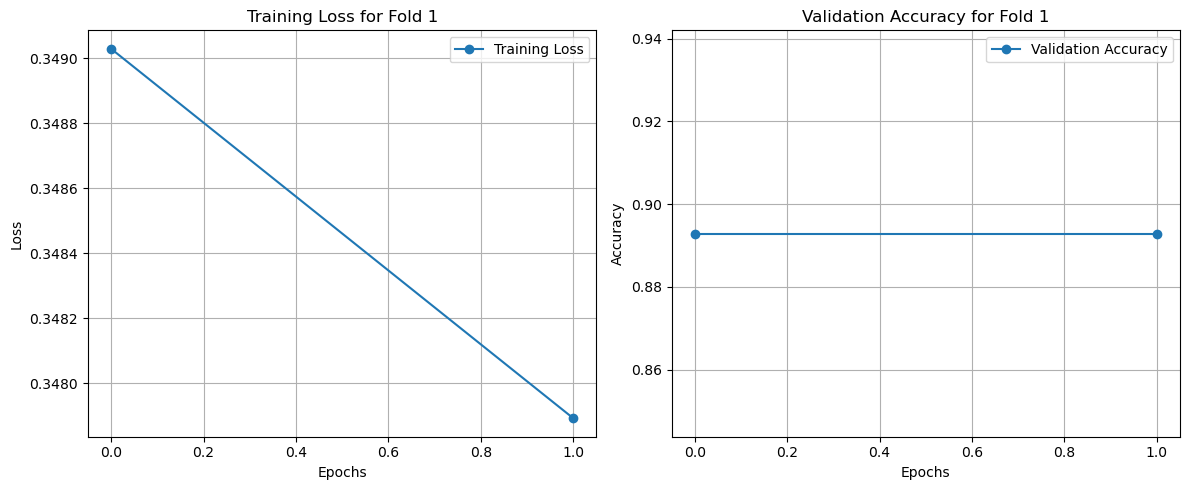

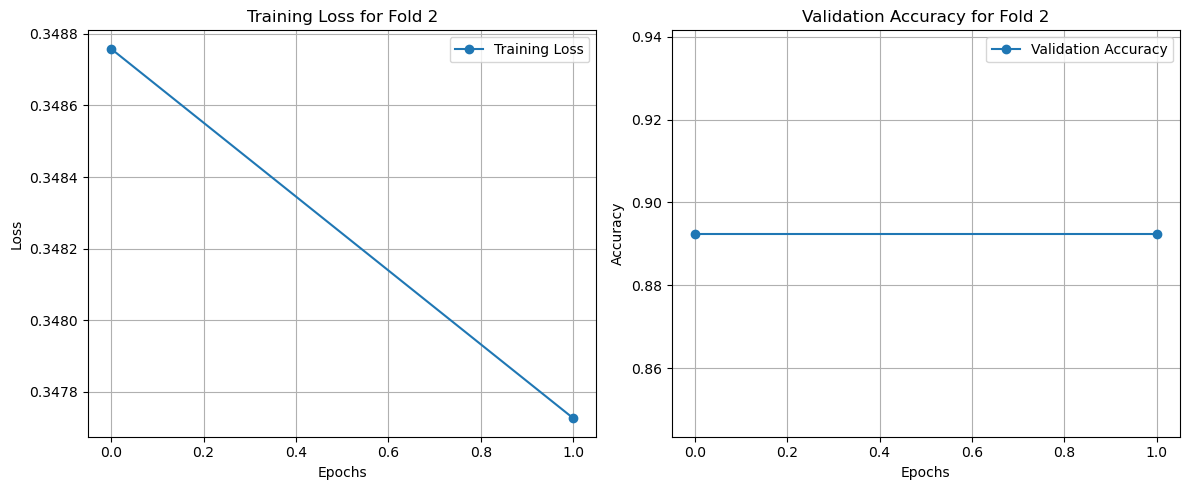

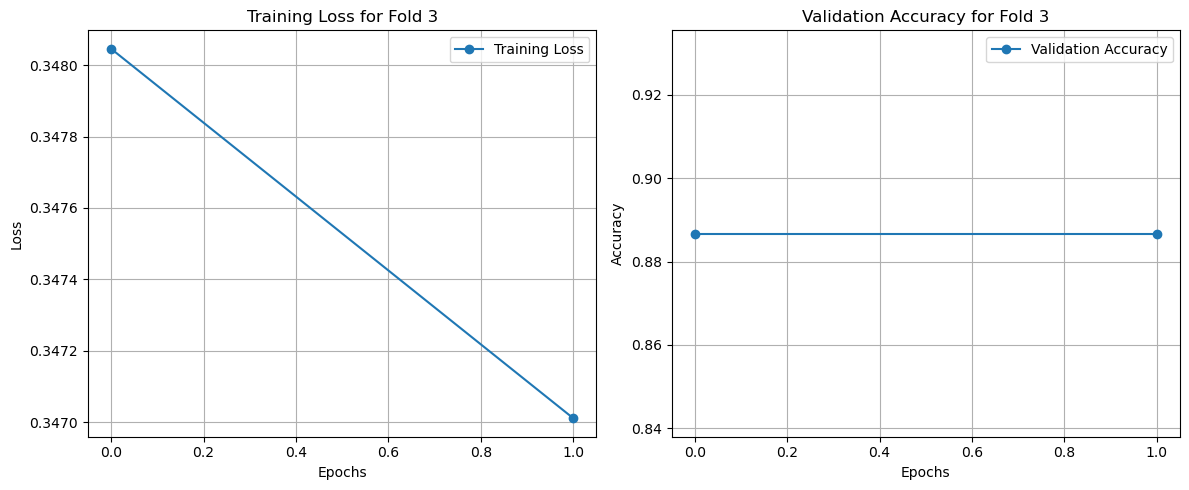

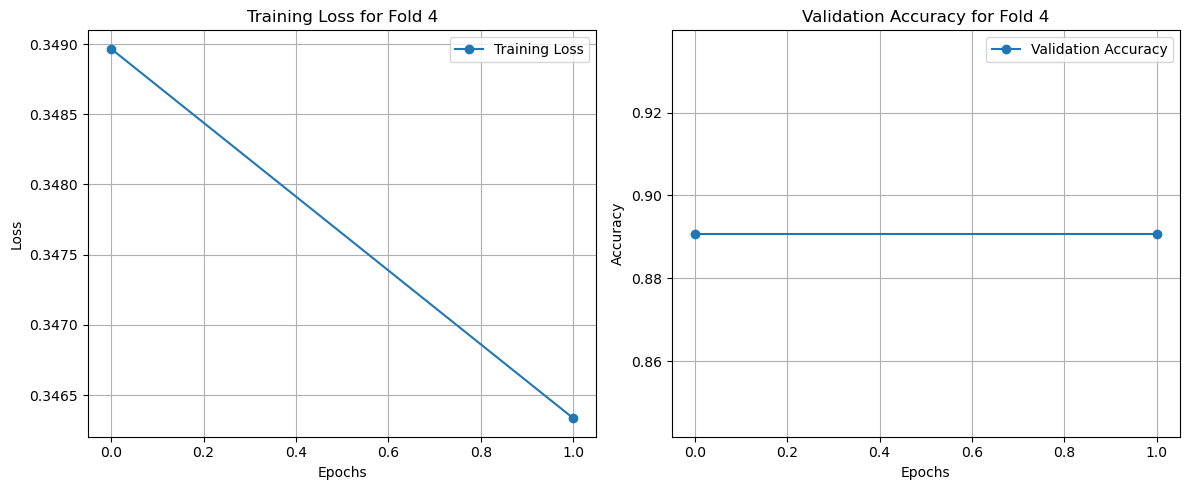

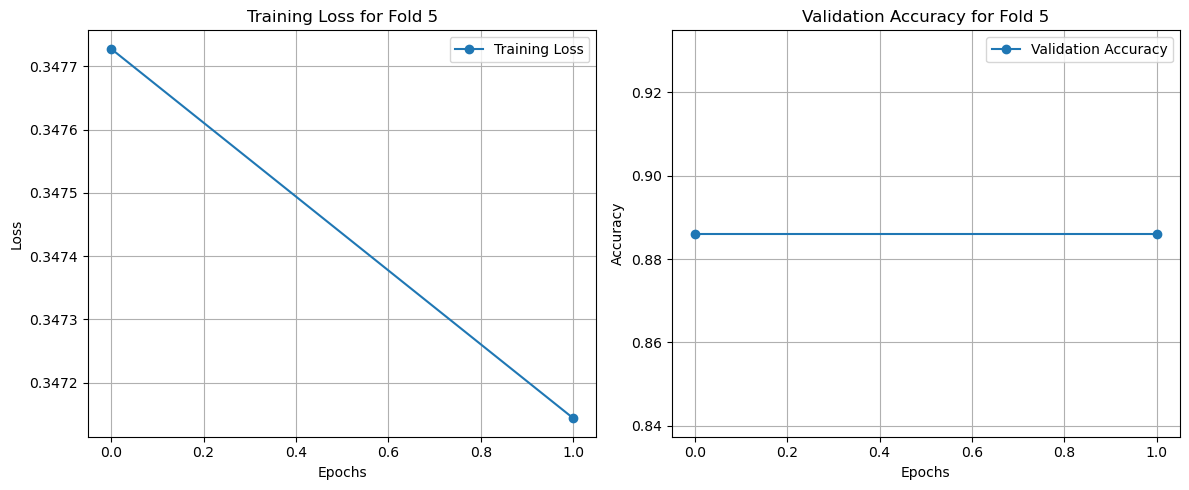

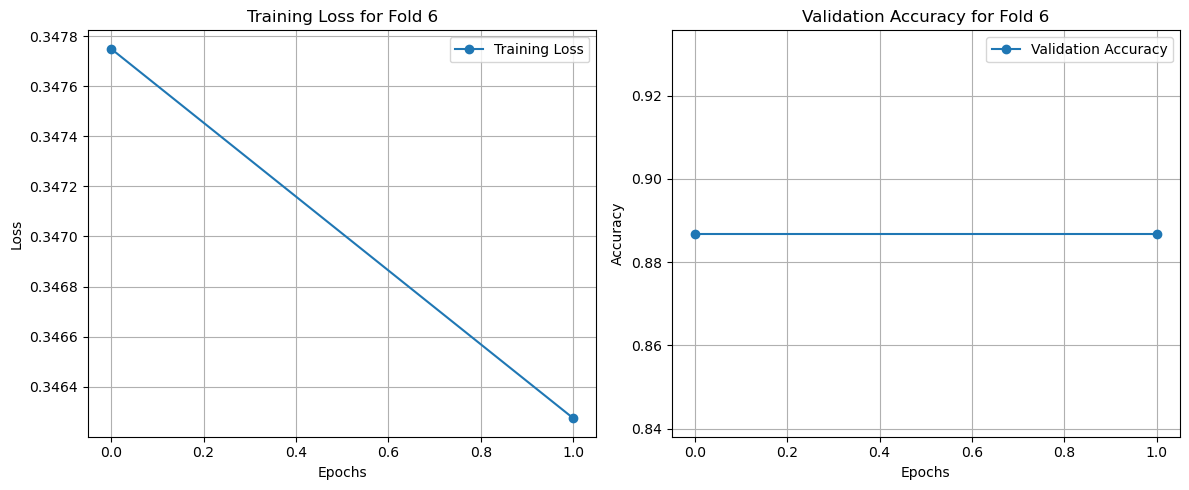

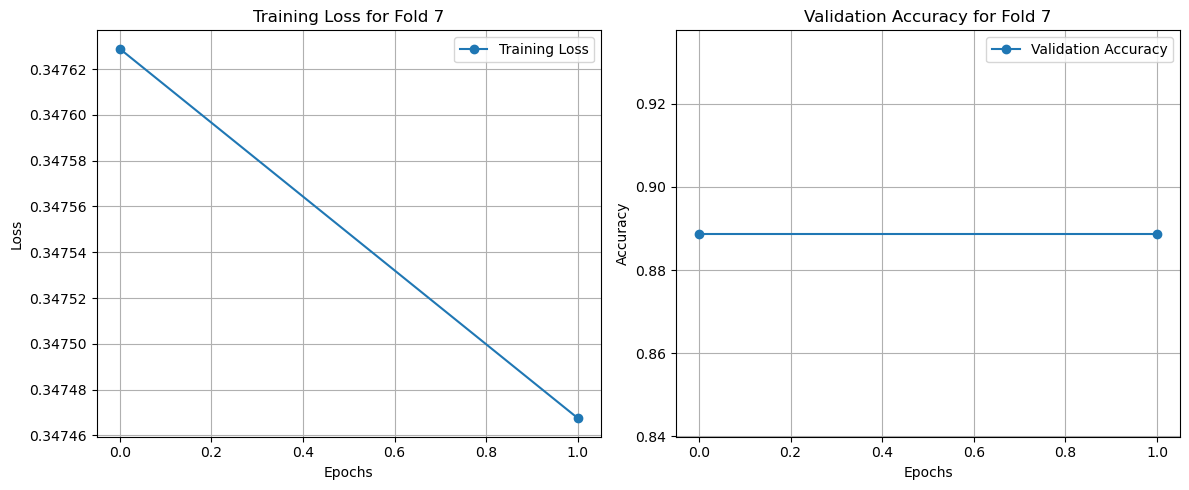

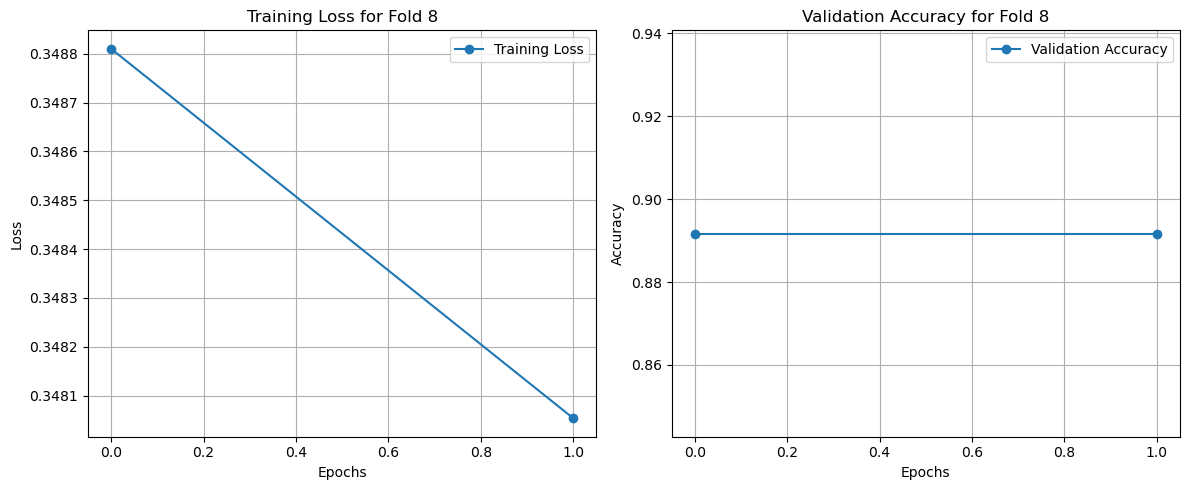

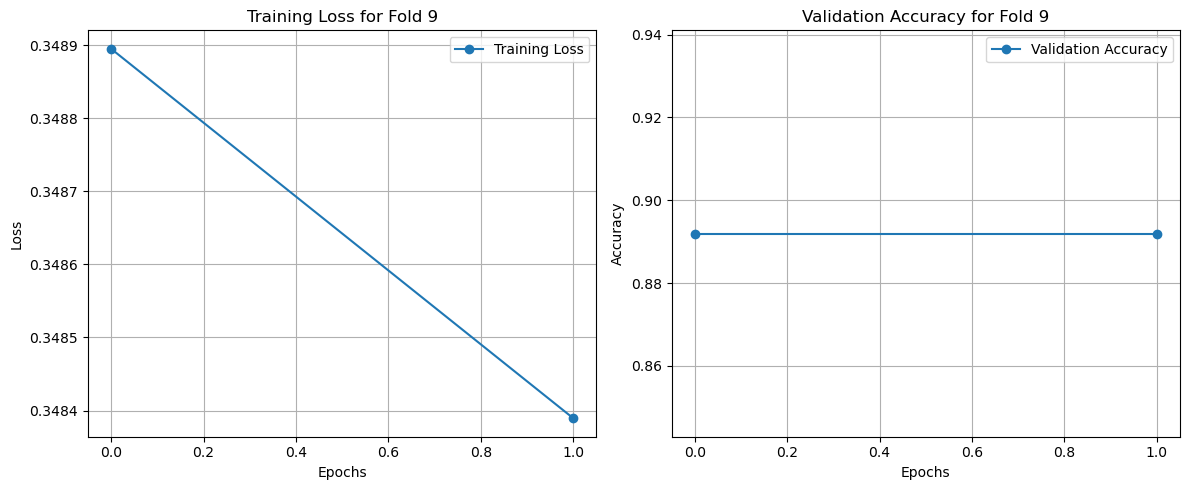

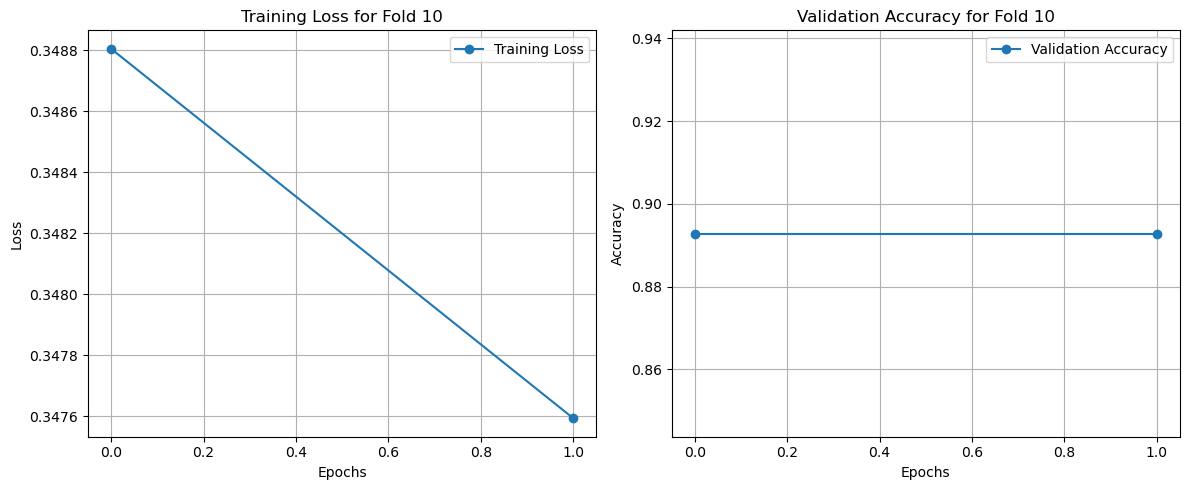

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing: Label Encoding
class_names = le1.classes_  # Save the original class names

# Check for missing values and replace with appropriate values
bin_data.fillna(0, inplace=True)  # Fill missing values with 0

# 2. Define FS-Transformer Model
class FSTransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=2, num_layers=2, dropout=0.1):
        super(FSTransformerModel, self).__init__()

        # Feature embedding for feature selection
        self.feature_embedding = nn.Parameter(torch.randn(input_dim, d_model))  # Learnable embedding for each feature
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)  # Output layer

    def forward(self, x):
        x = x @ self.feature_embedding  # Apply feature selection through embedding
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)
        x = self.transformer_encoder(x)  # Pass through the transformer encoder
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)  # Final output

# 3. KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []
average_train_losses = []  # List to store average train losses for plotting
average_val_accuracies = []  # List to store validation accuracies for plotting

for fold, (train_index, val_index) in enumerate(kf.split(bin_data)):
    print(f'Fold {fold + 1}')

    # Split data using .iloc to select rows by index
    X_train, X_val = bin_data.drop(columns=['Label']).iloc[train_index], bin_data.drop(columns=['Label']).iloc[val_index]
    y_train, y_val = bin_data['Label'].iloc[train_index], bin_data['Label'].iloc[val_index]

    # Convert to PyTorch tensors (only numeric columns)
    X_train_tensor = torch.FloatTensor(X_train.select_dtypes(include=np.number).values)
    y_train_tensor = torch.LongTensor(y_train.values)
    X_val_tensor = torch.FloatTensor(X_val.select_dtypes(include=np.number).values)
    y_val_tensor = torch.LongTensor(y_val.values)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize the FS-Transformer model
    model = FSTransformerModel(input_dim=X_train_tensor.shape[1], num_classes=len(class_names))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Early stopping setup
    best_accuracy = 0
    patience, trigger_times = 5, 0

    # Train the model
    num_epochs = 2  # Increase the number of epochs if needed
    train_losses = []  # List to store loss per epoch
    val_accuracies = []  # List to store accuracy per epoch

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(accuracy)

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), f'model_best_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    cls_report = classification_report(y_val, y_pred.numpy(), target_names=class_names)
    print(cls_report)

    # Store average loss and accuracy for plotting
    average_train_losses.append(train_losses)
    average_val_accuracies.append(val_accuracies)

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 4. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 5. Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# 6. Analysis of Results
print("Hasil Deteksi Pola Enkripsi Ransomware:")
for i, (acc, f1) in enumerate(zip(all_accuracy, all_f1_scores)):
    print(f'Fold {i + 1}: Akurasi = {acc * 100:.2f}%, F1 Score = {f1:.4f}')

# 7. Plot Loss and Accuracy for Each Fold
for fold in range(len(average_train_losses)):
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(average_train_losses[fold], label='Training Loss', marker='o')
    plt.title(f'Training Loss for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(average_val_accuracies[fold], label='Validation Accuracy', marker='o')
    plt.title(f'Validation Accuracy for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


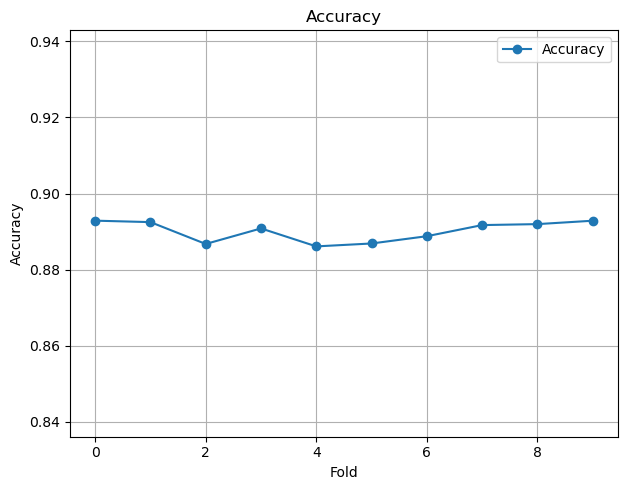

In [28]:
plt.figure(figsize=(12, 5))

# Grafik Akurasi
plt.subplot(1, 2, 2)
plt.plot(all_accuracy, label='Accuracy', marker='o')
plt.title(f'Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(min(all_accuracy)-0.05, max(all_accuracy)+0.05)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# **Hyperparameter Tuning**

In [29]:
import itertools
# Define the hyperparameters grid
param_grid = {
    'lr': [0.001, 0.0005],
    'batch_size': [16, 32],
    'nhead': [2, 4]
}

# Track the best model
best_accuracy = 0
best_params = None

# Loop over all combinations of hyperparameters
for lr, batch_size, nhead in itertools.product(param_grid['lr'],
                                               param_grid['batch_size'],
                                               param_grid['nhead']):
    print(f'Training with lr={lr}, batch_size={batch_size}, nhead={nhead}')

    # Reinitialize model with new hyperparameters, ensuring consistent d_model
    # ***CHANGE*** Use X_train_tensor.shape[1] for input_dim
    model = FSTransformerModel(input_dim=X_train_tensor.shape[1],
                             num_classes=len(class_names),
                             d_model=128, nhead=nhead, num_layers=3, dropout=0.3)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    # DataLoader with the new batch size
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Train for 2 epochs (for quick demonstration)
    for epoch in range(2):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Validate and calculate accuracy
    model.eval()
    with torch.no_grad():
        y_pred_probs = model(X_val_tensor)
        _, y_pred = torch.max(y_pred_probs, 1)
        accuracy = accuracy_score(y_val, y_pred.numpy())

    print(f'Validation Accuracy: {accuracy * 100:.2f}%')

    # Save best parameters
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {'lr': lr, 'batch_size': batch_size, 'nhead': nhead}

print(f'Best Params: {best_params} with Accuracy: {best_accuracy * 100:.2f}%')

Training with lr=0.001, batch_size=16, nhead=2
Validation Accuracy: 89.29%
Training with lr=0.001, batch_size=16, nhead=4
Validation Accuracy: 89.29%
Training with lr=0.001, batch_size=32, nhead=2
Validation Accuracy: 89.29%
Training with lr=0.001, batch_size=32, nhead=4
Validation Accuracy: 89.29%
Training with lr=0.0005, batch_size=16, nhead=2
Validation Accuracy: 89.29%
Training with lr=0.0005, batch_size=16, nhead=4
Validation Accuracy: 89.29%
Training with lr=0.0005, batch_size=32, nhead=2
Validation Accuracy: 89.29%
Training with lr=0.0005, batch_size=32, nhead=4
Validation Accuracy: 89.29%
Best Params: {'lr': 0.001, 'batch_size': 16, 'nhead': 2} with Accuracy: 89.29%


# **CLASSIFICATION With Hyperparameter Tuning**
(ganti parameter sesuai yang terbaik hasil hyperparameter tuning ya)

Classification with best parameter: {'lr': 0.001, 'batch_size': 16, 'nhead': 2}
Fold 1
Accuracy for fold 1: 89.29%
F1 Score for fold 1: 0.8423
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      7001
      normal       0.00      0.00      0.00       840

    accuracy                           0.89      7841
   macro avg       0.45      0.50      0.47      7841
weighted avg       0.80      0.89      0.84      7841



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


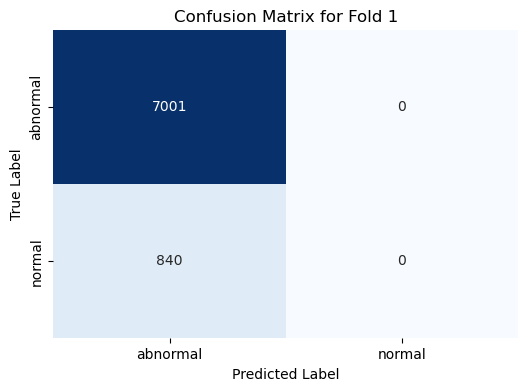

Fold 2
Accuracy for fold 2: 89.25%
F1 Score for fold 2: 0.8418
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      6998
      normal       0.00      0.00      0.00       843

    accuracy                           0.89      7841
   macro avg       0.45      0.50      0.47      7841
weighted avg       0.80      0.89      0.84      7841



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


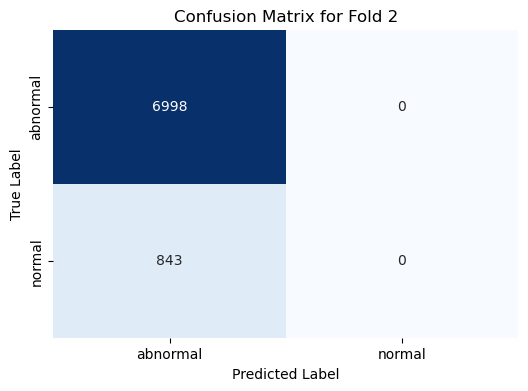

Fold 3
Accuracy for fold 3: 88.67%
F1 Score for fold 3: 0.8335
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      6953
      normal       0.00      0.00      0.00       888

    accuracy                           0.89      7841
   macro avg       0.44      0.50      0.47      7841
weighted avg       0.79      0.89      0.83      7841



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


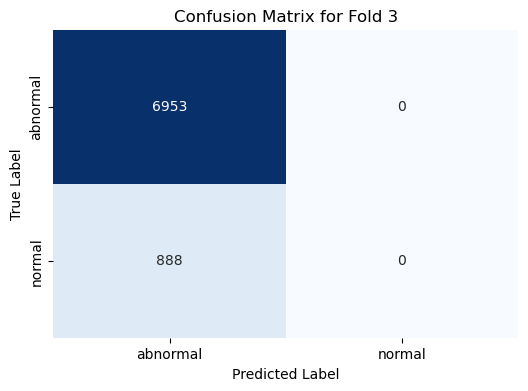

Fold 4
Accuracy for fold 4: 89.08%
F1 Score for fold 4: 0.8394
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      6985
      normal       0.00      0.00      0.00       856

    accuracy                           0.89      7841
   macro avg       0.45      0.50      0.47      7841
weighted avg       0.79      0.89      0.84      7841



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


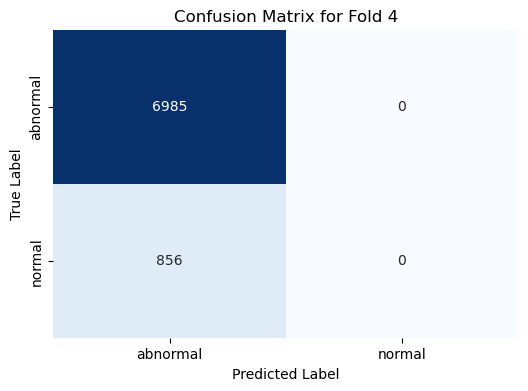

Fold 5
Accuracy for fold 5: 88.61%
F1 Score for fold 5: 0.8326
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      6948
      normal       0.00      0.00      0.00       893

    accuracy                           0.89      7841
   macro avg       0.44      0.50      0.47      7841
weighted avg       0.79      0.89      0.83      7841



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


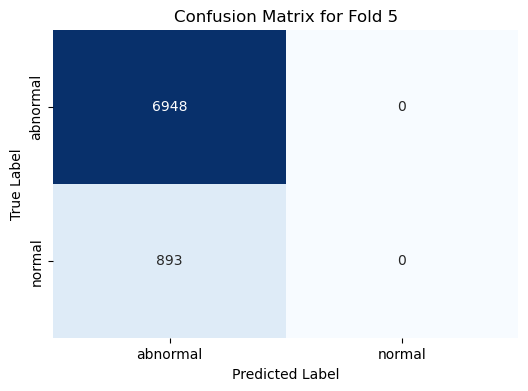

Fold 6
Accuracy for fold 6: 88.69%
F1 Score for fold 6: 0.8337
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      6954
      normal       0.00      0.00      0.00       887

    accuracy                           0.89      7841
   macro avg       0.44      0.50      0.47      7841
weighted avg       0.79      0.89      0.83      7841



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


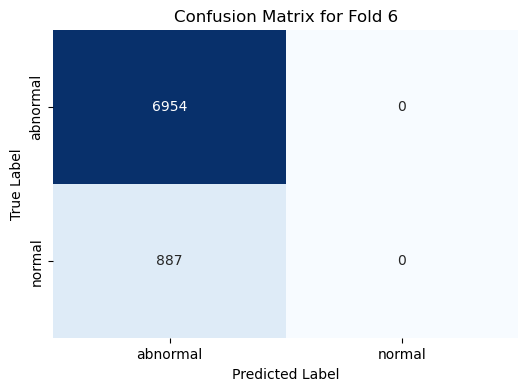

Fold 7
Accuracy for fold 7: 88.88%
F1 Score for fold 7: 0.8365
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      6969
      normal       0.00      0.00      0.00       872

    accuracy                           0.89      7841
   macro avg       0.44      0.50      0.47      7841
weighted avg       0.79      0.89      0.84      7841



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


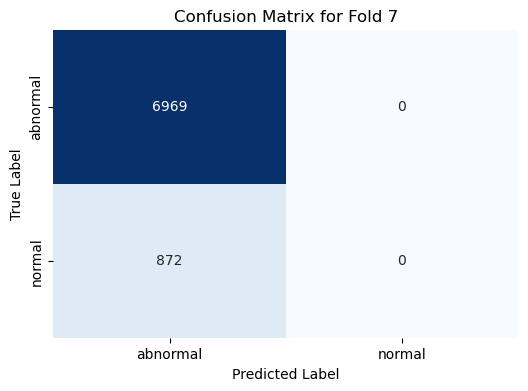

Fold 8
Accuracy for fold 8: 89.17%
F1 Score for fold 8: 0.8407
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      6991
      normal       0.00      0.00      0.00       849

    accuracy                           0.89      7840
   macro avg       0.45      0.50      0.47      7840
weighted avg       0.80      0.89      0.84      7840



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


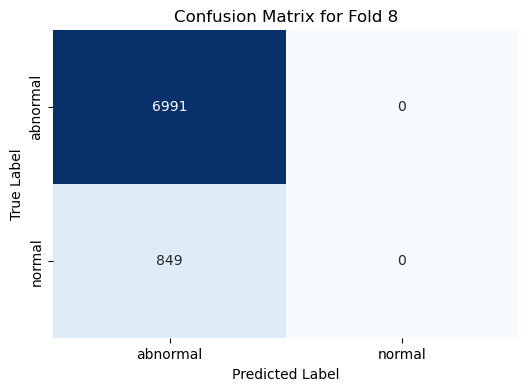

Fold 9
Accuracy for fold 9: 89.20%
F1 Score for fold 9: 0.8410
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      6993
      normal       0.00      0.00      0.00       847

    accuracy                           0.89      7840
   macro avg       0.45      0.50      0.47      7840
weighted avg       0.80      0.89      0.84      7840



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


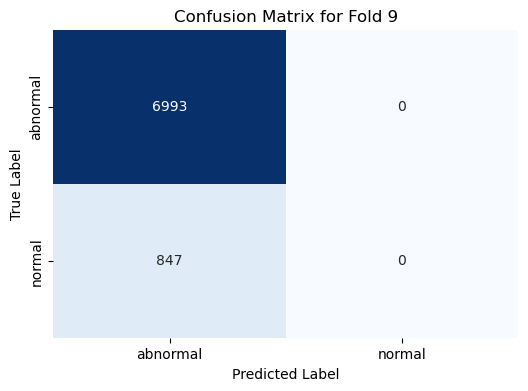

Fold 10
Accuracy for fold 10: 89.29%
F1 Score for fold 10: 0.8423
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      7000
      normal       0.00      0.00      0.00       840

    accuracy                           0.89      7840
   macro avg       0.45      0.50      0.47      7840
weighted avg       0.80      0.89      0.84      7840



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


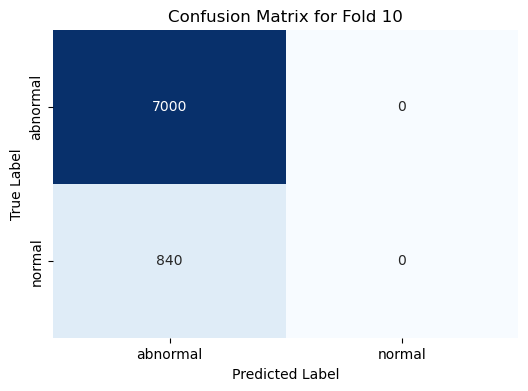

Average Accuracy: 89.01%
Average F1 Score: 0.8384


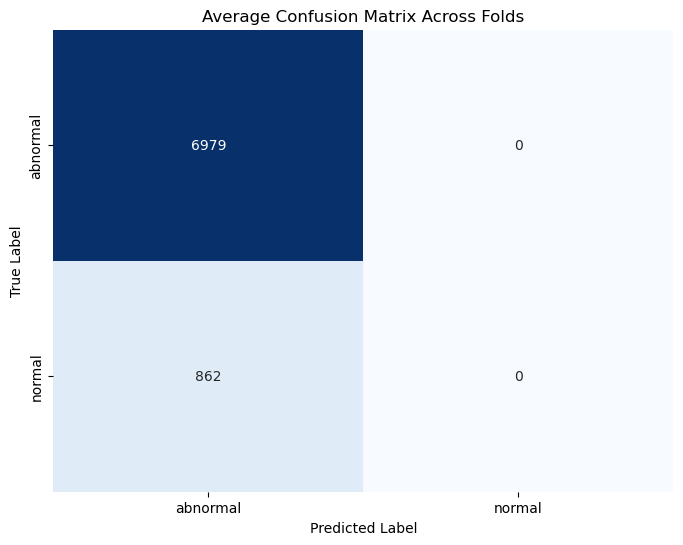

Hasil Deteksi Pola Enkripsi Ransomware:
Fold 1: Akurasi = 89.29%, F1 Score = 0.8423
Fold 2: Akurasi = 89.25%, F1 Score = 0.8418
Fold 3: Akurasi = 88.67%, F1 Score = 0.8335
Fold 4: Akurasi = 89.08%, F1 Score = 0.8394
Fold 5: Akurasi = 88.61%, F1 Score = 0.8326
Fold 6: Akurasi = 88.69%, F1 Score = 0.8337
Fold 7: Akurasi = 88.88%, F1 Score = 0.8365
Fold 8: Akurasi = 89.17%, F1 Score = 0.8407
Fold 9: Akurasi = 89.20%, F1 Score = 0.8410
Fold 10: Akurasi = 89.29%, F1 Score = 0.8423


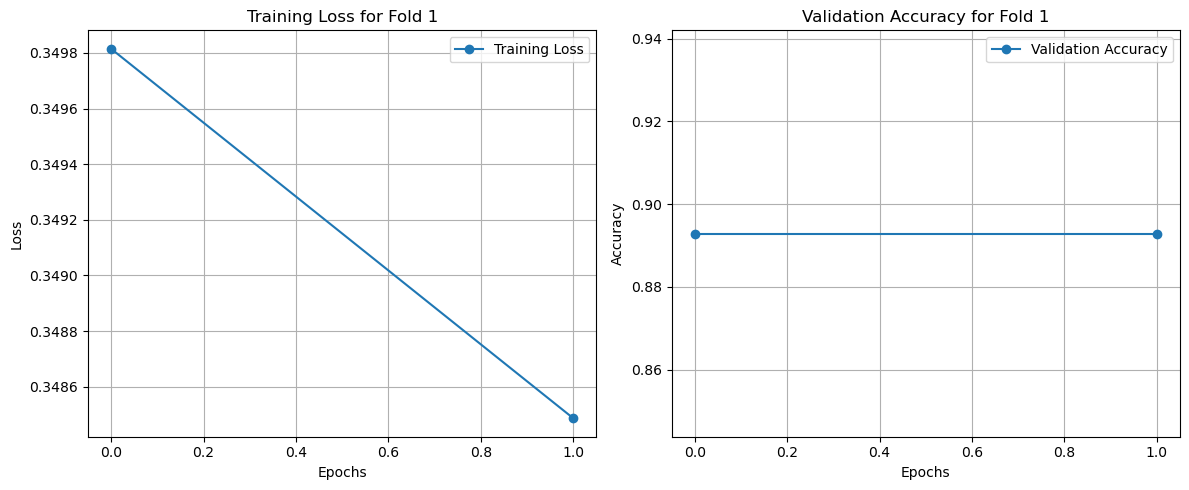

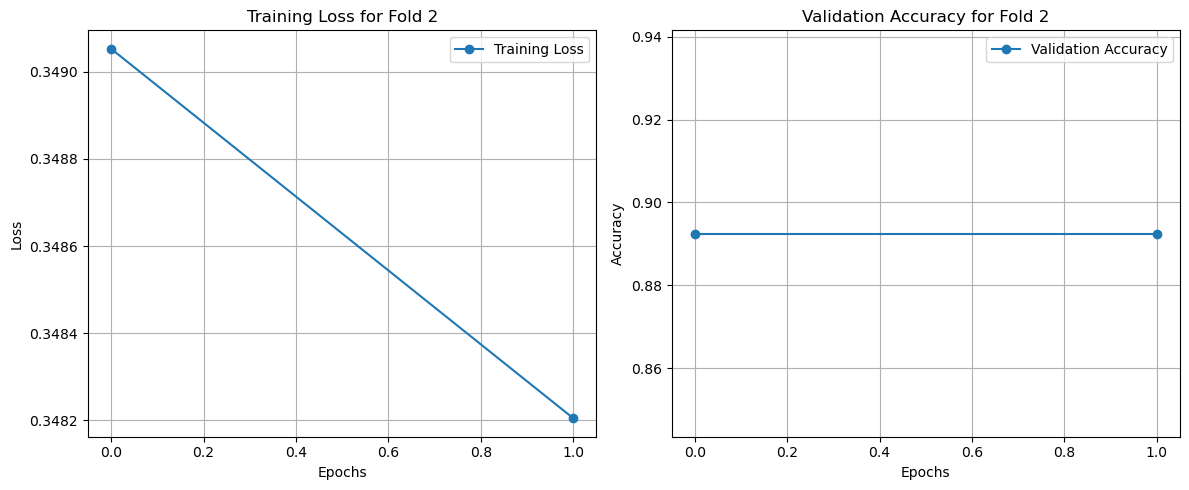

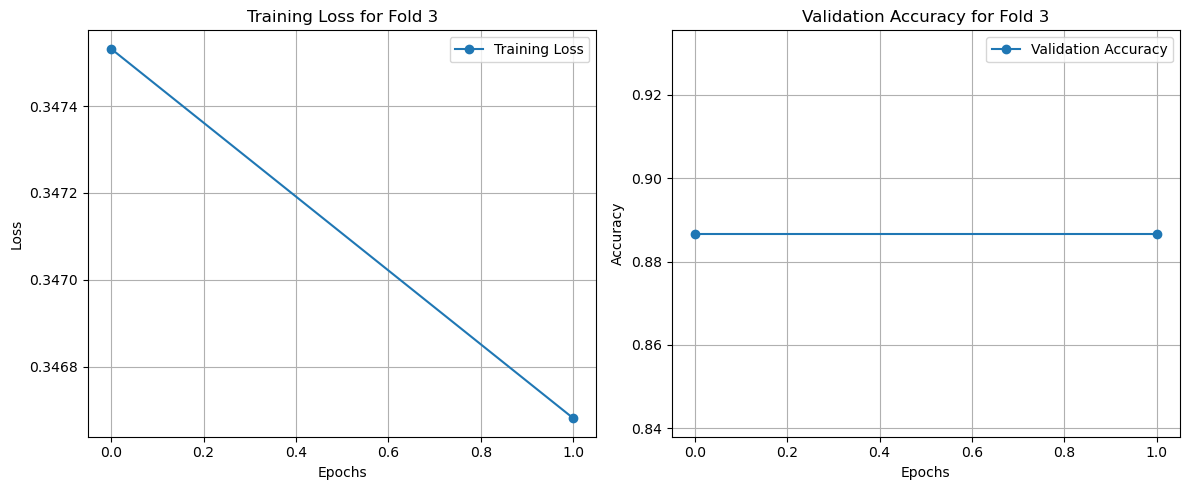

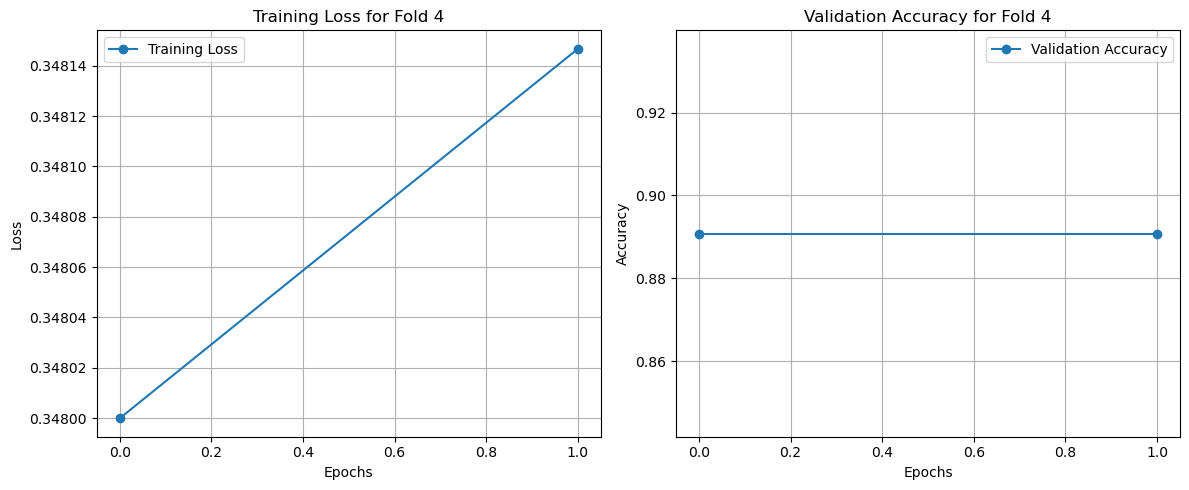

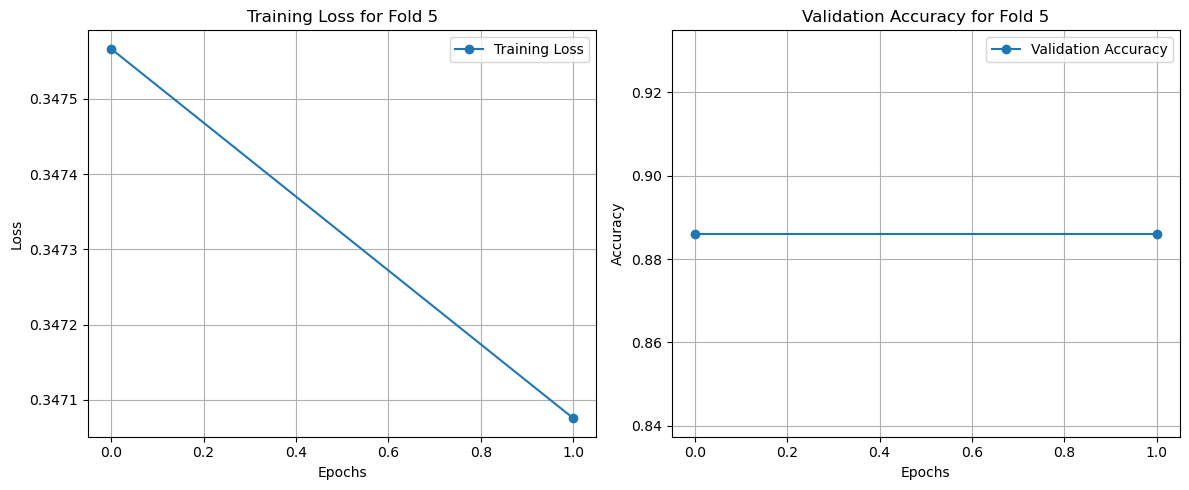

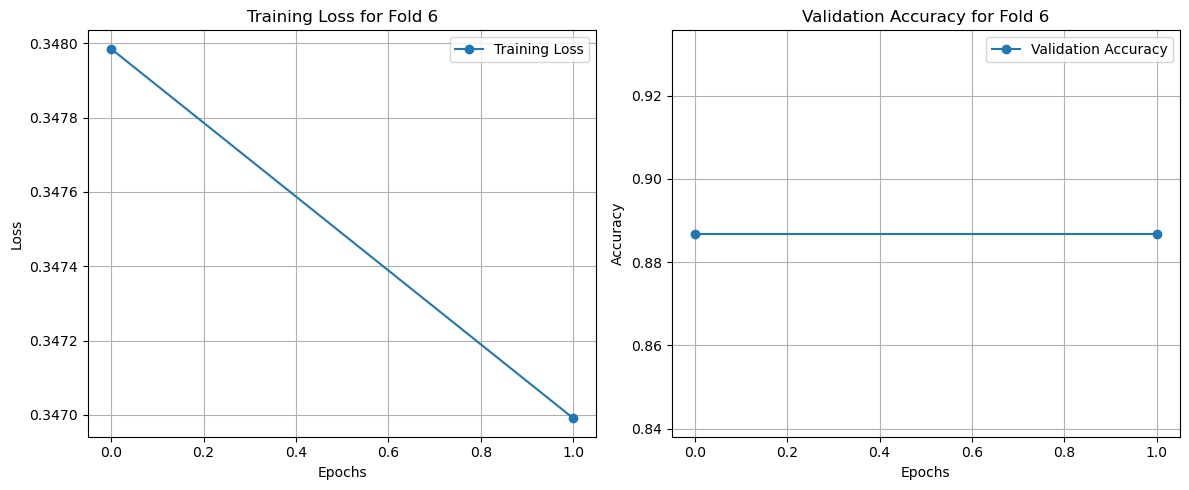

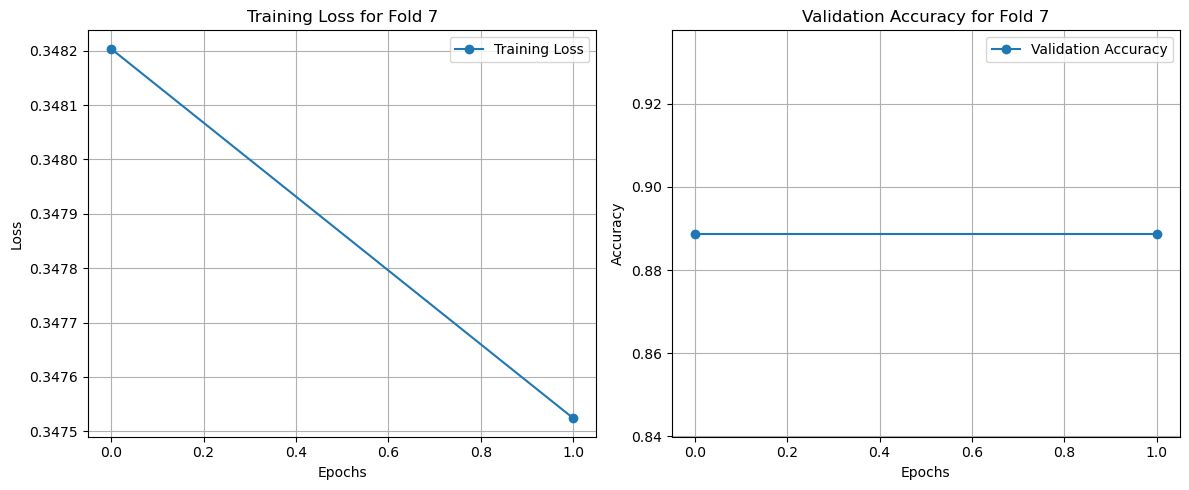

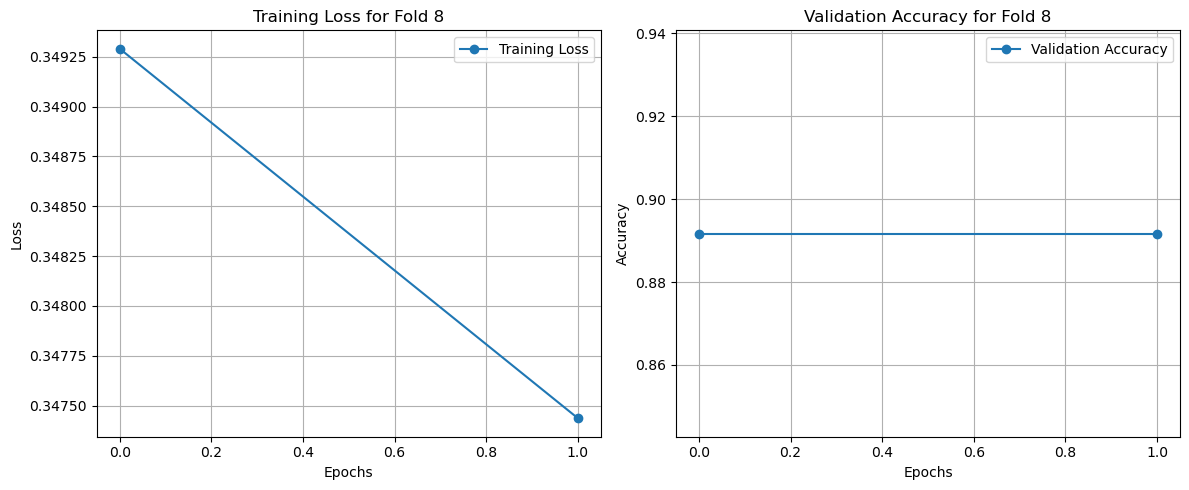

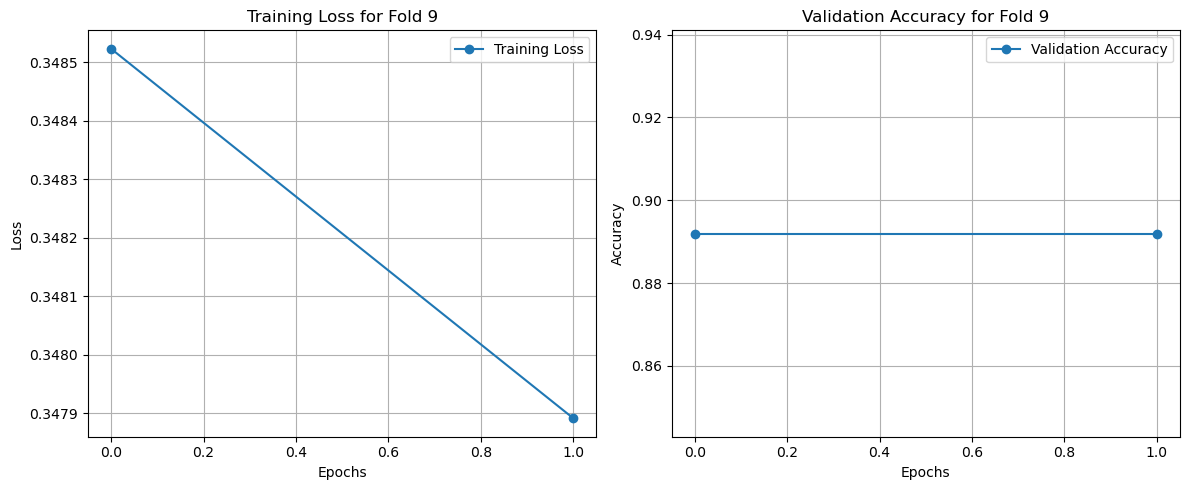

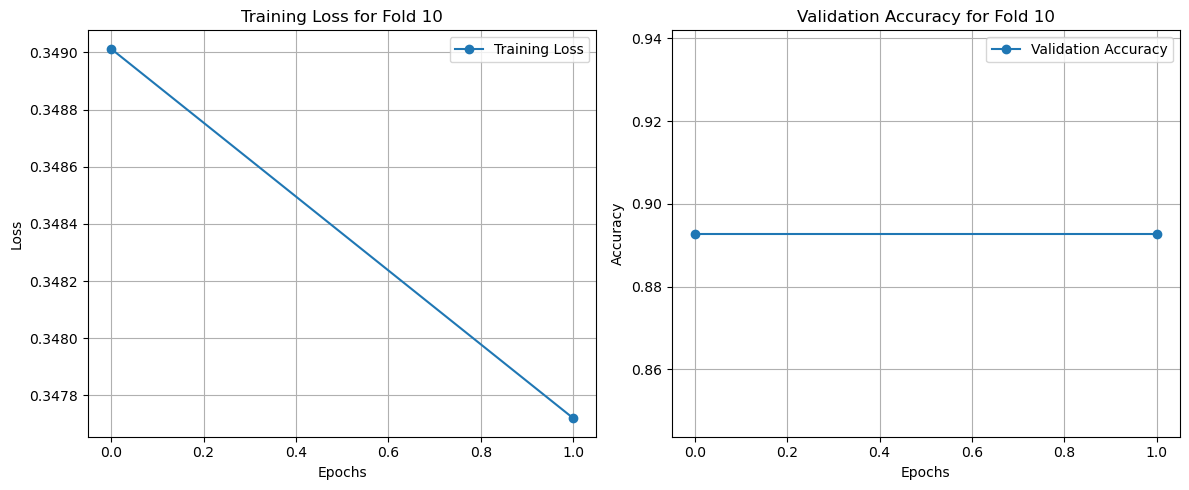

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing: Label Encoding
class_names = le1.classes_  # Save the original class names

# Check for missing values and replace with appropriate values
bin_data.fillna(0, inplace=True)  # Fill missing values with 0

# 2. Define FS-Transformer Model
class FSTransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=2, num_layers=2, dropout=0.1):
        super(FSTransformerModel, self).__init__()

        # Feature embedding for feature selection
        self.feature_embedding = nn.Parameter(torch.randn(input_dim, d_model))  # Learnable embedding for each feature
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)  # Output layer

    def forward(self, x):
        x = x @ self.feature_embedding  # Apply feature selection through embedding
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)
        x = self.transformer_encoder(x)  # Pass through the transformer encoder
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)  # Final output

# 3. KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []
average_train_losses = []  # List to store average train losses for plotting
average_val_accuracies = []  # List to store validation accuracies for plotting

# {'lr': 0.001, 'batch_size': 16, 'nhead': 2} with Accuracy: 89.29%
print(f'Classification with best parameter: {best_params}')

for fold, (train_index, val_index) in enumerate(kf.split(bin_data)):
    print(f'Fold {fold + 1}')

    # Split data using .iloc to select rows by index
    X_train, X_val = bin_data.drop(columns=['Label']).iloc[train_index], bin_data.drop(columns=['Label']).iloc[val_index]
    y_train, y_val = bin_data['Label'].iloc[train_index], bin_data['Label'].iloc[val_index]

    # Convert to PyTorch tensors (only numeric columns)
    X_train_tensor = torch.FloatTensor(X_train.select_dtypes(include=np.number).values)
    y_train_tensor = torch.LongTensor(y_train.values)
    X_val_tensor = torch.FloatTensor(X_val.select_dtypes(include=np.number).values)
    y_val_tensor = torch.LongTensor(y_val.values)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=best_params["batch_size"], shuffle=True)

    # Initialize the FS-Transformer model
    model = FSTransformerModel(input_dim=X_train_tensor.shape[1], num_classes=len(class_names), nhead=best_params["nhead"])
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=best_params["lr"])

    # Early stopping setup
    best_accuracy = 0
    patience, trigger_times = 5, 0

    # Train the model
    num_epochs = 2  # Increase the number of epochs if needed
    train_losses = []  # List to store loss per epoch
    val_accuracies = []  # List to store accuracy per epoch

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(accuracy)

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), f'model_best_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    cls_report = classification_report(y_val, y_pred.numpy(), target_names=class_names)
    print(cls_report)

    # Store average loss and accuracy for plotting
    average_train_losses.append(train_losses)
    average_val_accuracies.append(val_accuracies)

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 4. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 5. Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# 6. Analysis of Results
print("Hasil Deteksi Pola Enkripsi Ransomware:")
for i, (acc, f1) in enumerate(zip(all_accuracy, all_f1_scores)):
    print(f'Fold {i + 1}: Akurasi = {acc * 100:.2f}%, F1 Score = {f1:.4f}')

# 7. Plot Loss and Accuracy for Each Fold
for fold in range(len(average_train_losses)):
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(average_train_losses[fold], label='Training Loss', marker='o')
    plt.title(f'Training Loss for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(average_val_accuracies[fold], label='Validation Accuracy', marker='o')
    plt.title(f'Validation Accuracy for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()
